In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def function(x):
    return np.sin(x)

implementation of the atkin neville scheme

In [13]:
def aitken_neville(x,vals,x_bar):
    n = len(x)-1
    for m in range(1,n):
        for j in range(0,n-m):
            vals[j] = ((x_bar-x[j])*vals[j+1] - (x_bar-x[j+m])*vals[j])/(x[j+m]-x[j])
    return vals[0]

$D$ approximates the derivative of a function.

In [14]:
def D(x_, h):
    return (function(x_ + h) - function(x_)) / h

$D_{f,sym}$ also approximates the derivative of a function from both sides.

Compute the error between the approximated derivative and the real derivative. Since we can not compute
the derivative $D$ of $f$ (division by $h = 0$), we use small values of $h$ and approximate the derivative using the atkin neville scheme.
Then we can extrapolate the derivative by looking at $h = 0$.

In [15]:
def diff(q, derivative):
    x = np.pi
    n = 11
    err = []
    for k in range(1, n): # generate interpolation points with different h
        h = [q**i for i in range(0,k)]
        f = [derivative(x,i) for i in h] # compute interpolation y values
        res = aitken_neville(h, f, 0) # extrapolate at position 0
        e = np.cos(x)-res # compare the result of the approximation with the real derivative value at x
        err.append(abs(e))
    return err

compute the errors for different values of $q$

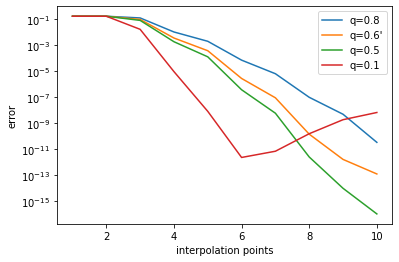

In [16]:
errors1 = diff(0.8, D)
errors2 = diff(0.6, D)
errors3 = diff(0.5, D)
errors4 = diff(0.1, D)

plt.yscale("log")
plt.xlabel("interpolation points")
plt.ylabel("error")
plt.plot (range(1,len(errors1)+1), errors1, label="q=0.8")
plt.plot (range(1,len(errors2)+1), errors2, label="q=0.6'")
plt.plot (range(1,len(errors3)+1), errors3, label="q=0.5")
plt.plot (range(1,len(errors4)+1), errors4, label="q=0.1")
plt.legend()
plt.show()

The smaller $q$ the faster the error converges. However, if $q$ is too
small the error is not stable for a higher number of interpolation points
and increases again. The best reachable accuracy can be achieved by using $q=0.5$.


In [17]:
def D_sym_sqrt(x_, h):
    return (function(x_ + np.sqrt(h)) - function(x_ - np.sqrt(h))) / (2 * np.sqrt(h))

In [18]:
def D_sym(x_, h):
    return (function(x_ + h) - function(x_ - h)) / (2 * h)

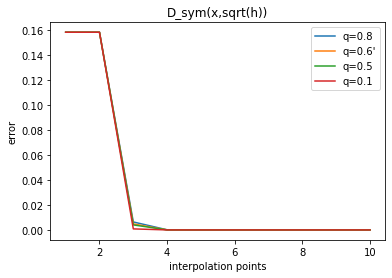

In [19]:
errors1 = diff(0.8, D_sym_sqrt)
errors2 = diff(0.6, D_sym_sqrt)
errors3 = diff(0.5, D_sym_sqrt)
errors4 = diff(0.1, D_sym_sqrt)

# plt.yscale("log")
plt.title("D_sym(x,sqrt(h))")
plt.xlabel("interpolation points")
plt.ylabel("error")

plt.plot (range(1,len(errors1)+1), errors1, label="q=0.8")
plt.plot (range(1,len(errors2)+1), errors2, label="q=0.6'")
plt.plot (range(1,len(errors3)+1), errors3, label="q=0.5")
plt.plot (range(1,len(errors4)+1), errors4, label="q=0.1")

plt.legend()
plt.show()

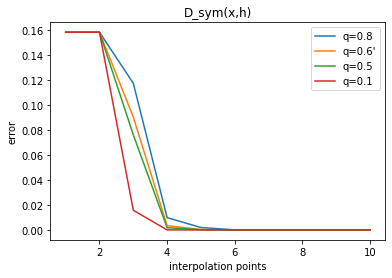

In [20]:
errors5 = diff(0.8, D_sym)
errors6 = diff(0.6, D_sym)
errors7 = diff(0.5, D_sym)
errors8 = diff(0.1, D_sym)

plt.title("D_sym(x,h)")
plt.xlabel("interpolation points")
plt.ylabel("error")

plt.plot (range(1,len(errors5)+1), errors5, label="q=0.8")
plt.plot (range(1,len(errors6)+1), errors6, label="q=0.6'")
plt.plot (range(1,len(errors7)+1), errors7, label="q=0.5")
plt.plot (range(1,len(errors8)+1), errors8, label="q=0.1")

plt.legend()
plt.show()